In [1]:
rm(list=ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,534205,28.6,1205410,64.4,641780,34.3
Vcells,994119,7.6,8388608,64.0,1754429,13.4


In [2]:
library(Seurat)

In [3]:
setwd("scRNAseq_WBC_revision/merge")

In [4]:
load("scRNAseq_WBC_revision/corelation/Lymophiod.seurat.object.Rdata")

In [5]:
append.lym=seurat
rm(seurat)

In [6]:
append.lym

An object of class Seurat 
24241 features across 5704 samples within 1 assay 
Active assay: RNA (24241 features)
 1 dimensional reduction calculated: umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

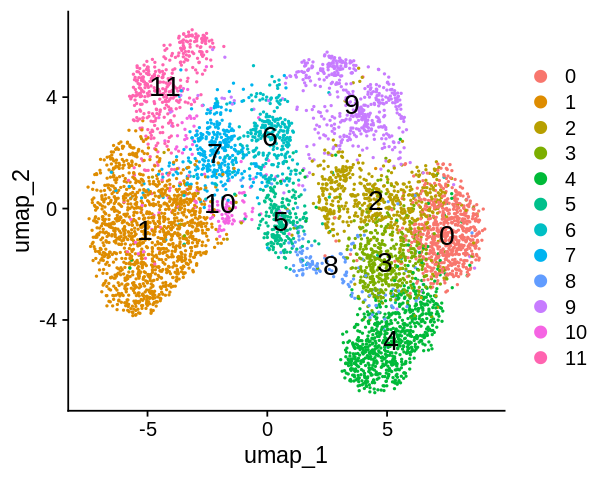

In [7]:
options(repr.plot.width=5,repr.plot.height=4)
DimPlot(append.lym,reduction = "umap",label = T,label.size = 6,group.by = "new_louvain")

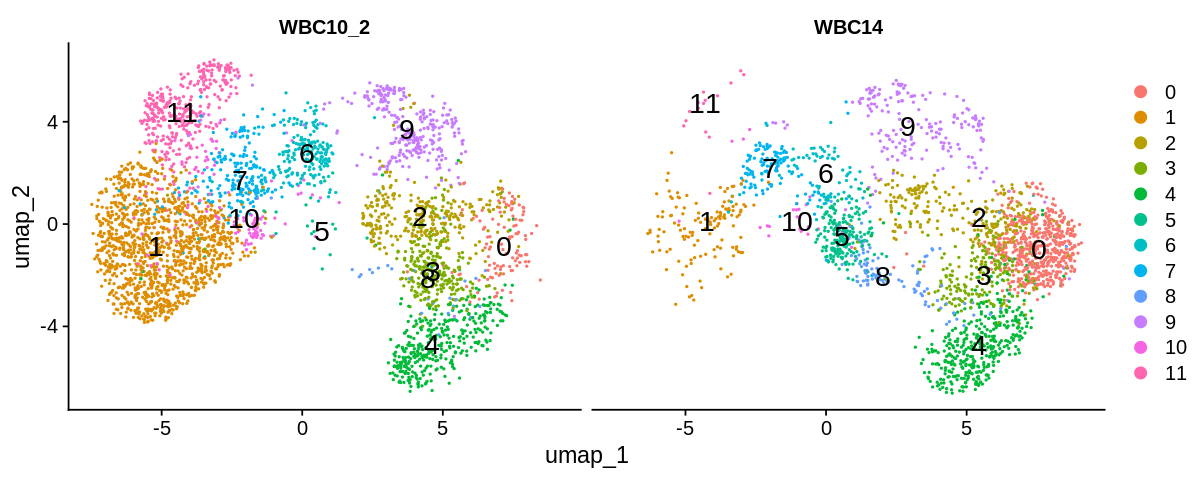

In [8]:
options(repr.plot.width=10,repr.plot.height=4)
DimPlot(append.lym,reduction = "umap",label = T,label.size = 6,group.by = "new_louvain",split.by = "batch")

In [10]:
append.lym.delete.cellCycle=subset(append.lym,cells = colnames(append.lym)[append.lym$new_louvain %in% as.character(c(0:8,10))] )

In [11]:
table(append.lym.delete.cellCycle$new_louvain)


   0    1    2    3    4    5    6    7    8    9   10   11 
 663 1322  575  453  742  217  276  342  132    0  129    0 

In [12]:
#append.lym.delete.cellCycle <- NormalizeData(append.lym.delete.cellCycle, normalization.method = "LogNormalize", scale.factor = 10000)
append.lym.delete.cellCycle <- FindVariableFeatures(append.lym.delete.cellCycle, selection.method = "vst", nfeatures = 2000)
append.lym.delete.cellCycle <- ScaleData(append.lym.delete.cellCycle, verbose = FALSE)
append.lym.delete.cellCycle <- RunPCA(append.lym.delete.cellCycle, npcs = 30, verbose = FALSE)
append.lym.delete.cellCycle <- RunUMAP(append.lym.delete.cellCycle, reduction = "pca", dims = 1:30)
append.lym.delete.cellCycle <- FindNeighbors(append.lym.delete.cellCycle, dims = 1:30)
append.lym.delete.cellCycle <- FindClusters(append.lym.delete.cellCycle, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”15:13:33 UMAP embedding parameters a = 0.9922 b = 1.112
15:13:33 Read 4851 rows and found 30 numeric columns
15:13:33 Using Annoy for neighbor search, n_neighbors = 30
15:13:33 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
15:13:34 Writing NN index file to temp file /tmp/RtmpE3BXsq/file5614d3806094c
15:13:34 Searching Annoy index using 1 thread, search_k = 3000
15:13:36 Annoy recall = 100%
15:13:36 Commencing smooth kNN distance calibration using 1 thread
15:13:37 Initializing from normalized Laplacian + noise
15:13:37 Commencing optimizati

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4851
Number of edges: 207803

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9031
Number of communities: 13
Elapsed time: 0 seconds


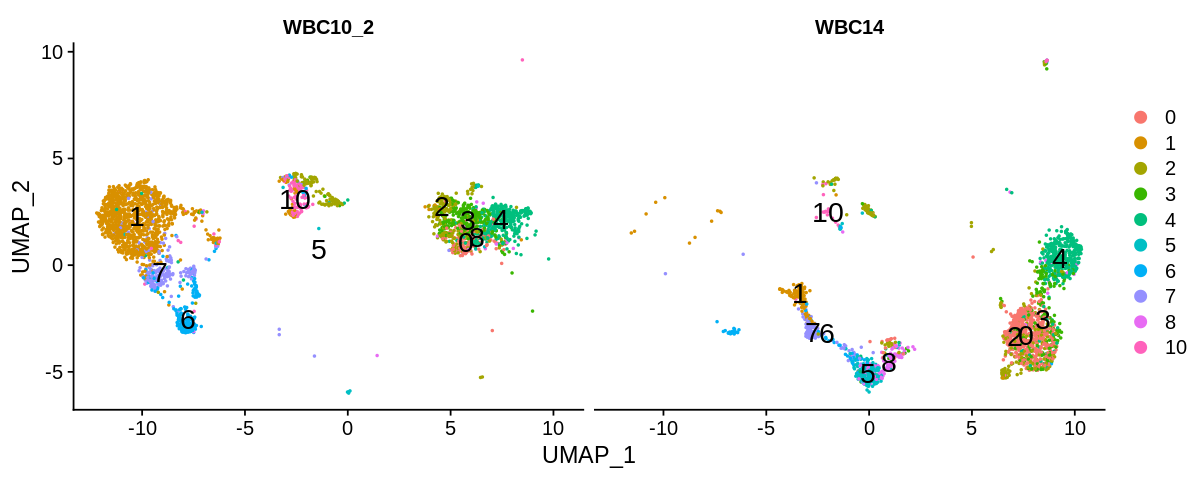

In [14]:
options(repr.plot.width=10,repr.plot.height=4)
DimPlot(append.lym.delete.cellCycle,reduction = "umap",label = T,label.size = 6,group.by = "new_louvain",split.by = "batch")

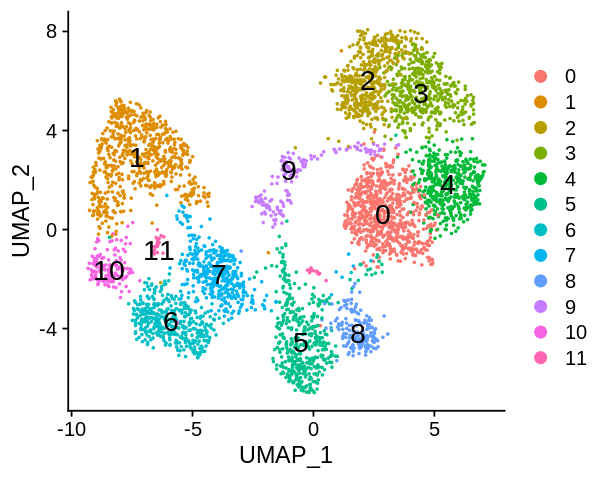

In [15]:
load("scRNAseq_skin/fetal_liver_WBC_wd/WBC.integrate.fetal.liver.Rdata")
options(repr.plot.width=5,repr.plot.height=4)
DimPlot(lym,reduction = "umap",label = T,label.size = 6)

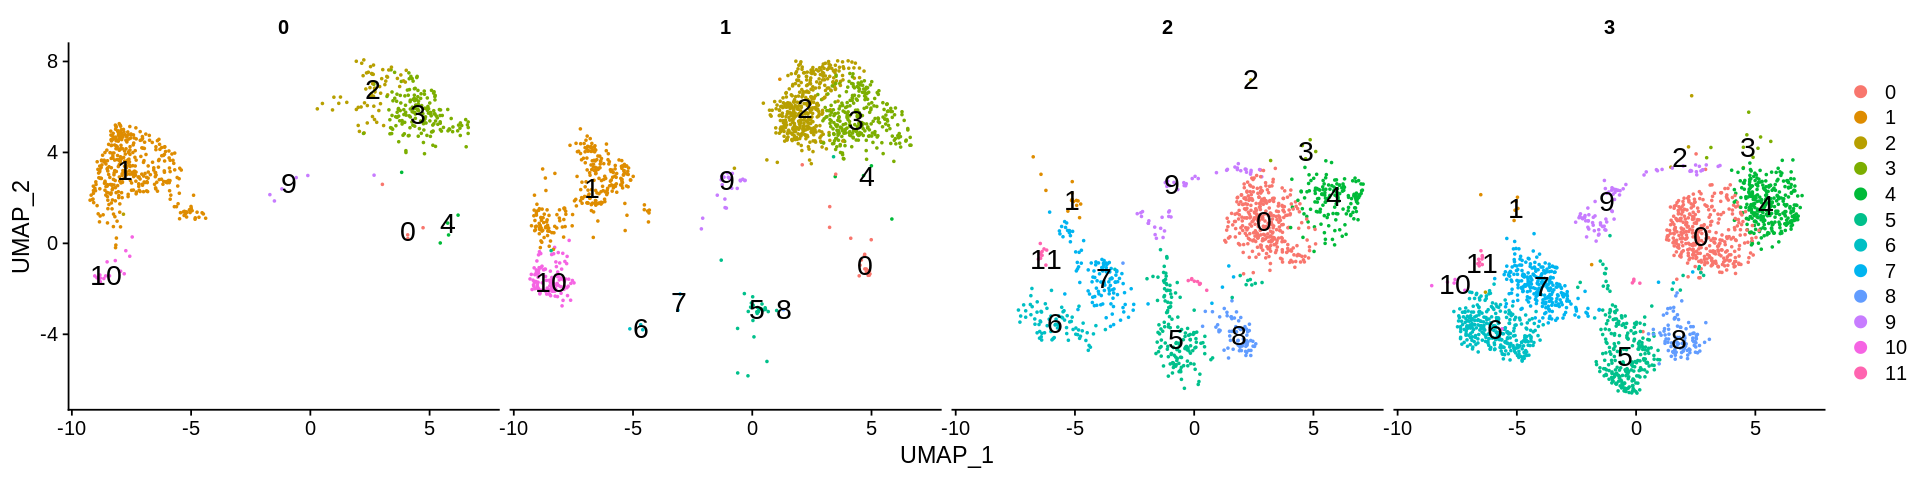

In [16]:
options(repr.plot.width=16,repr.plot.height=4)
DimPlot(lym,reduction = "umap",label = T,label.size = 6,split.by = "batch")

In [18]:
lym

An object of class Seurat 
20135 features across 4455 samples within 1 assay 
Active assay: RNA (20135 features)
 4 dimensional reductions calculated: diffmap, draw_graph_fa, pca, umap

In [21]:
lym$cellAnno=Idents(lym)

In [22]:
lym.list=SplitObject(lym,split.by = "batch")
names(lym.list)

[1] "0" "1" "2" "3"

In [23]:
append.lym.delete.cellCycle.list=SplitObject(append.lym.delete.cellCycle,split.by = "batch")

In [24]:
total.lym.list=list(lym.list[[1]],lym.list[[2]],lym.list[[3]],lym.list[[4]],append.lym.delete.cellCycle.list[[1]],append.lym.delete.cellCycle.list[[2]])
total.lym.list

[[1]]
An object of class Seurat 
20135 features across 643 samples within 1 assay 
Active assay: RNA (20135 features)
 4 dimensional reductions calculated: diffmap, draw_graph_fa, pca, umap

[[2]]
An object of class Seurat 
20135 features across 1130 samples within 1 assay 
Active assay: RNA (20135 features)
 4 dimensional reductions calculated: diffmap, draw_graph_fa, pca, umap

[[3]]
An object of class Seurat 
20135 features across 975 samples within 1 assay 
Active assay: RNA (20135 features)
 4 dimensional reductions calculated: diffmap, draw_graph_fa, pca, umap

[[4]]
An object of class Seurat 
20135 features across 1707 samples within 1 assay 
Active assay: RNA (20135 features)
 4 dimensional reductions calculated: diffmap, draw_graph_fa, pca, umap

[[5]]
An object of class Seurat 
24241 features across 2794 samples within 1 assay 
Active assay: RNA (24241 features)
 2 dimensional reductions calculated: umap, pca

[[6]]
An object of class Seurat 
24241 features across 2057 sample

In [ ]:
for(i in 1:length(total.lym.list)){
  total.lym.list[[i]]=FindVariableFeatures(total.lym.list[[i]], selection.method = "vst", nfeatures = 2000)
}

In [ ]:
total.lym.anchors <- FindIntegrationAnchors(object.list = total.lym.list, dims = 1:30)
total.lym.integrated <- IntegrateData(anchorset = total.lym.anchors, dims = 1:30)

In [9]:
load("tmp.Rdata")

In [10]:
ls()

[1] "append.lym"                       "append.lym.delete.cellCycle"     
 [3] "append.lym.delete.cellCycle.list" "clusters"                        
 [5] "i"                                "IL7Pos.liver.dataset.ExpM"       
 [7] "IL7RPos.liver.cs20.ExpM"          "IL7RPos.liver.cs23.ExpM"         
 [9] "lym"                              "lym.integrated"                  
[11] "lym.list"                         "lym.precursor"                   
[13] "lym.precursor.anchors"            "total.lym.anchors"               
[15] "total.lym.integrated"             "total.lym.list"

In [11]:
DefaultAssay(total.lym.integrated) <- "integrated"

In [12]:
total.lym.integrated <- ScaleData(total.lym.integrated, verbose = FALSE)
total.lym.integrated <- RunPCA(total.lym.integrated, npcs = 30, verbose = FALSE)
total.lym.integrated <- RunUMAP(total.lym.integrated, reduction = "pca", dims = 1:30)
total.lym.integrated <- FindNeighbors(total.lym.integrated, dims = 1:30)
total.lym.integrated <- FindClusters(total.lym.integrated, resolution = 0.5)

15:56:11 UMAP embedding parameters a = 0.9922 b = 1.112
15:56:11 Read 9306 rows and found 30 numeric columns
15:56:11 Using Annoy for neighbor search, n_neighbors = 30
15:56:11 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
15:56:12 Writing NN index file to temp file /tmp/RtmpO745D0/file5ae34175452e8
15:56:12 Searching Annoy index using 1 thread, search_k = 3000
15:56:16 Annoy recall = 100%
15:56:16 Commencing smooth kNN distance calibration using 1 thread
15:56:17 Initializing from normalized Laplacian + noise
15:56:17 Commencing optimization for 500 epochs, with 433334 positive edges
15:56:44 Optimization finished
Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9306
Number of edges: 531662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8857
Number of communities: 14
Elapsed time: 1 seconds


Warning message:
“Removed 12 rows containing missing values (geom_text).”

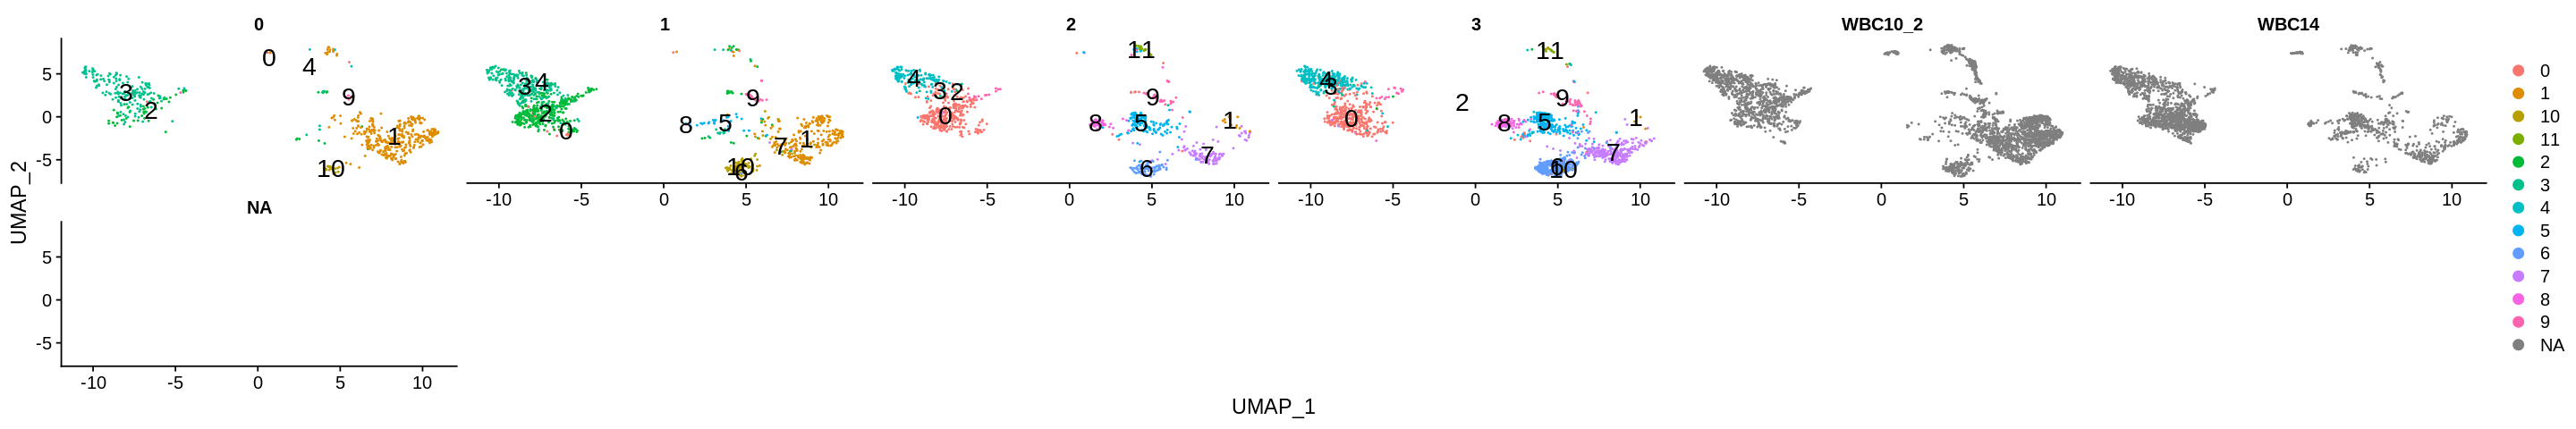

In [16]:
options(repr.plot.width=24,repr.plot.height=4)
DimPlot(total.lym.integrated,reduction = "umap",label = T,label.size = 6,split.by = "batch",group.by = "cellAnno")

In [18]:
###########################################################################
##transfer label

In [20]:
for(i in 1:length(lym.list)){
  lym.list[[i]]=FindVariableFeatures(lym.list[[i]], selection.method = "vst", nfeatures = 2000)
}

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”

In [21]:
lym.anchors <- FindIntegrationAnchors(object.list = lym.list, dims = 1:30)
lym.integrated <- IntegrateData(anchorset = lym.anchors, dims = 1:30)

Computing 2000 integration features
Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 2583 anchors
Filtering anchors
	Retained 1689 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 2628 anchors
Filtering anchors
	Retained 1380 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 3319 anchors
Filtering anchors
	Retained 2164 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 3005 anchors
Filtering anchors
	Retained 1161 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 4233 anchors
Filtering anchors
	Retained 2131 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 3916 anch

In [22]:
DefaultAssay(lym.integrated) <- "integrated"

In [23]:
lym.integrated <- ScaleData(lym.integrated, verbose = FALSE)
lym.integrated <- RunPCA(lym.integrated, npcs = 30, verbose = FALSE)
lym.integrated <- RunUMAP(lym.integrated, reduction = "pca", dims = 1:30)
lym.integrated <- FindNeighbors(lym.integrated, dims = 1:30)
lym.integrated <- FindClusters(lym.integrated, resolution = 0.5)

16:04:40 UMAP embedding parameters a = 0.9922 b = 1.112
16:04:40 Read 4455 rows and found 30 numeric columns
16:04:40 Using Annoy for neighbor search, n_neighbors = 30
16:04:40 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
16:04:40 Writing NN index file to temp file /tmp/RtmpO745D0/file5ae341f2228ea
16:04:40 Searching Annoy index using 1 thread, search_k = 3000
16:04:42 Annoy recall = 100%
16:04:42 Commencing smooth kNN distance calibration using 1 thread
16:04:43 Initializing from normalized Laplacian + noise
16:04:43 Commencing optimization for 500 epochs, with 199394 positive edges
16:04:57 Optimization finished
Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4455
Number of edges: 244355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8647
Number of communities: 9
Elapsed time: 0 seconds


In [24]:
append.lym.delete.cellCycle <- FindVariableFeatures(append.lym.delete.cellCycle, selection.method = "vst", nfeatures = 2000)
append.lym.delete.cellCycle <- ScaleData(append.lym.delete.cellCycle, verbose = FALSE)
append.lym.delete.cellCycle <- RunPCA(append.lym.delete.cellCycle, npcs = 30, verbose = FALSE)
append.lym.delete.cellCycle <- RunUMAP(append.lym.delete.cellCycle, reduction = "pca", dims = 1:30)
append.lym.delete.cellCycle <- FindNeighbors(append.lym.delete.cellCycle, dims = 1:30)
append.lym.delete.cellCycle <- FindClusters(append.lym.delete.cellCycle, resolution = 0.5)

16:07:39 UMAP embedding parameters a = 0.9922 b = 1.112
16:07:39 Read 4851 rows and found 30 numeric columns
16:07:39 Using Annoy for neighbor search, n_neighbors = 30
16:07:39 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
16:07:40 Writing NN index file to temp file /tmp/RtmpO745D0/file5ae3479962968
16:07:40 Searching Annoy index using 1 thread, search_k = 3000
16:07:42 Annoy recall = 100%
16:07:42 Commencing smooth kNN distance calibration using 1 thread
16:07:43 Initializing from normalized Laplacian + noise
16:07:43 Commencing optimization for 500 epochs, with 204306 positive edges
16:07:58 Optimization finished
Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4851
Number of edges: 199190

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9038
Number of communities: 11
Elapsed time: 0 seconds


In [25]:
transfer.anchors <- FindTransferAnchors(reference = lym.integrated, query = append.lym.delete.cellCycle,dims = 1:30)

Performing PCA on the provided reference using 2000 features as input.
Projecting PCA
Finding neighborhoods
Finding anchors
	Found 2520 anchors
Filtering anchors
	Retained 1265 anchors
Extracting within-dataset neighbors


In [26]:
predictions <- TransferData(anchorset = transfer.anchors, refdata = lym.integrated$cellAnno,dims = 1:30)

Finding integration vectors
Finding integration vector weights
Predicting cell labels


In [28]:
head(rownames(predictions))

[1] "AAACCCAAGTCAACAA-1-WBC10_2" "AAACCCAGTTCTAAGC-1-WBC10_2"
[3] "AAACCCATCTCTATGT-1-WBC10_2" "AAACGAAAGGTAAGTT-1-WBC10_2"
[5] "AAACGAACATAATGAG-1-WBC10_2" "AAACGAATCCAAGGGA-1-WBC10_2"

In [29]:
addlabel.index=match(rownames(predictions),colnames(total.lym.integrated))
sum(is.na(addlabel.index))

[1] 0

In [30]:
length(total.lym.integrated$cellAnno)
sum(is.na(total.lym.integrated$cellAnno))
dim(predictions)

[1] 9306

[1] 4851

[1] 4851   14

In [32]:
total.lym.integrated$cellAnno[addlabel.index]=predictions$predicted.id

In [33]:
sum(is.na(total.lym.integrated$cellAnno))

[1] 0

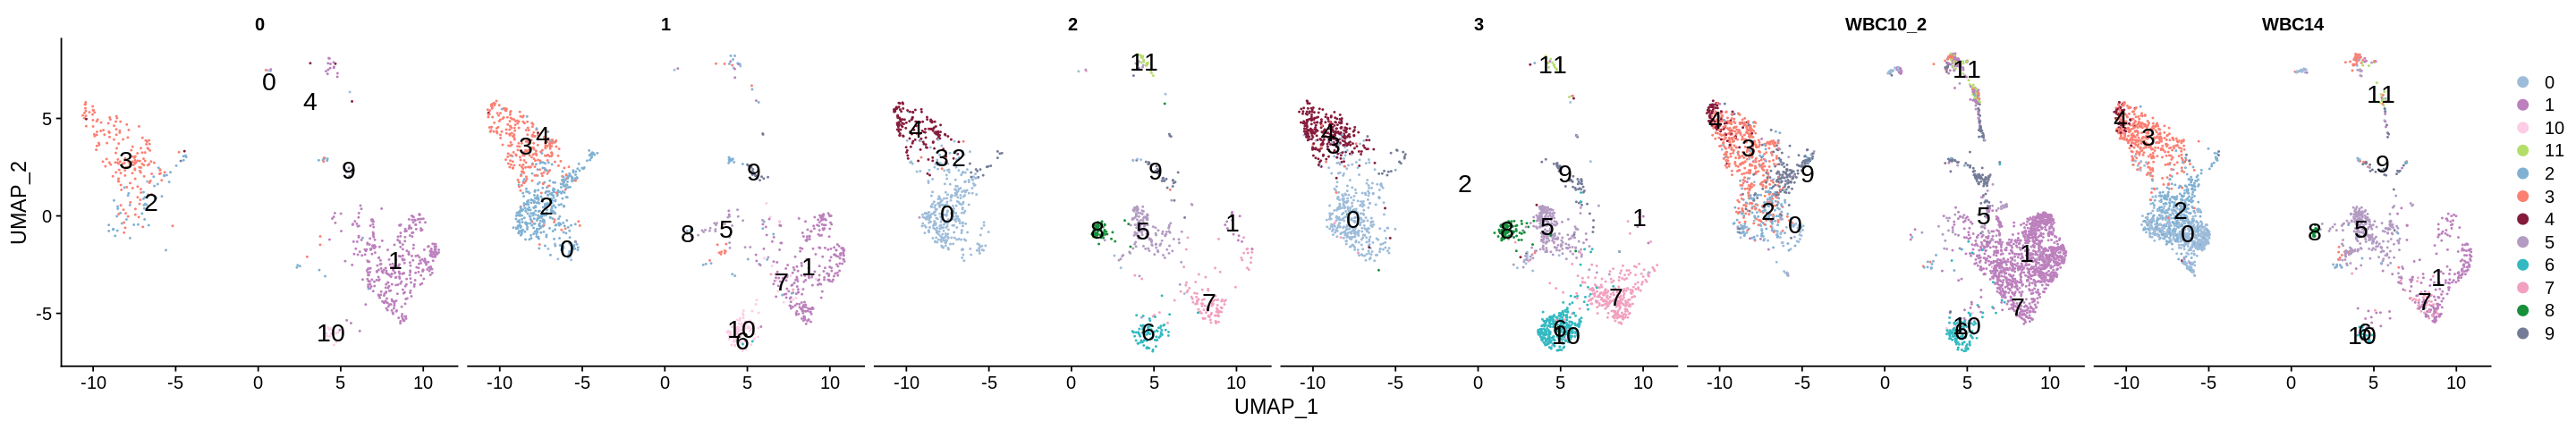

In [57]:
selCols=(c("#DCB717","#E2272E","#5EA5C9","#76AB62","#91217F","#fdb462","#EA9014","#5A7FB9","#757C98","#178F3B","#F1A1BF","#33B9C1","#B39BC2","#851B3B","#fb8072","#80b1d3","#b3de69","#fccde5","#bc80bd","#9ebcda"))
options(repr.plot.width=24,repr.plot.height=4)
DimPlot(total.lym.integrated,reduction = "umap",label = T,label.size = 6,split.by = "batch",group.by = "cellAnno",cols = rev(selCols))

In [35]:
table(total.lym.integrated$cellAnno,total.lym.integrated$batch)

    
        0    1    2    3 WBC10_2 WBC14
  0     4   19  333  363      88   539
  1   379  263   14    7    1364   236
  10   16  114    0    6      14     4
  11    0    0   19   13      72    15
  2    62  397    1    4     175   351
  3   171  278    5   10     495   433
  4     5    4  145  296      75    38
  5     0   28  150  247      96   320
  6     0    3   76  318     124    22
  7     0    2  114  272       1    44
  8     0    1   68   96       0    23
  9     6   21   50   75     290    32

In [37]:
Idents(total.lym.integrated)=total.lym.integrated$batch
new.batch=c("10w","12w","12w","14w","15_17w","15_17w")
names(new.batch)=c("0","1","WBC10_2","WBC14","2","3")
total.lym.integrated=RenameIdents(total.lym.integrated,new.batch)

In [42]:
total.lym.integrated$new.batch=Idents(total.lym.integrated)

In [70]:
usedCols=sample(selCols,size = 12,replace = F)

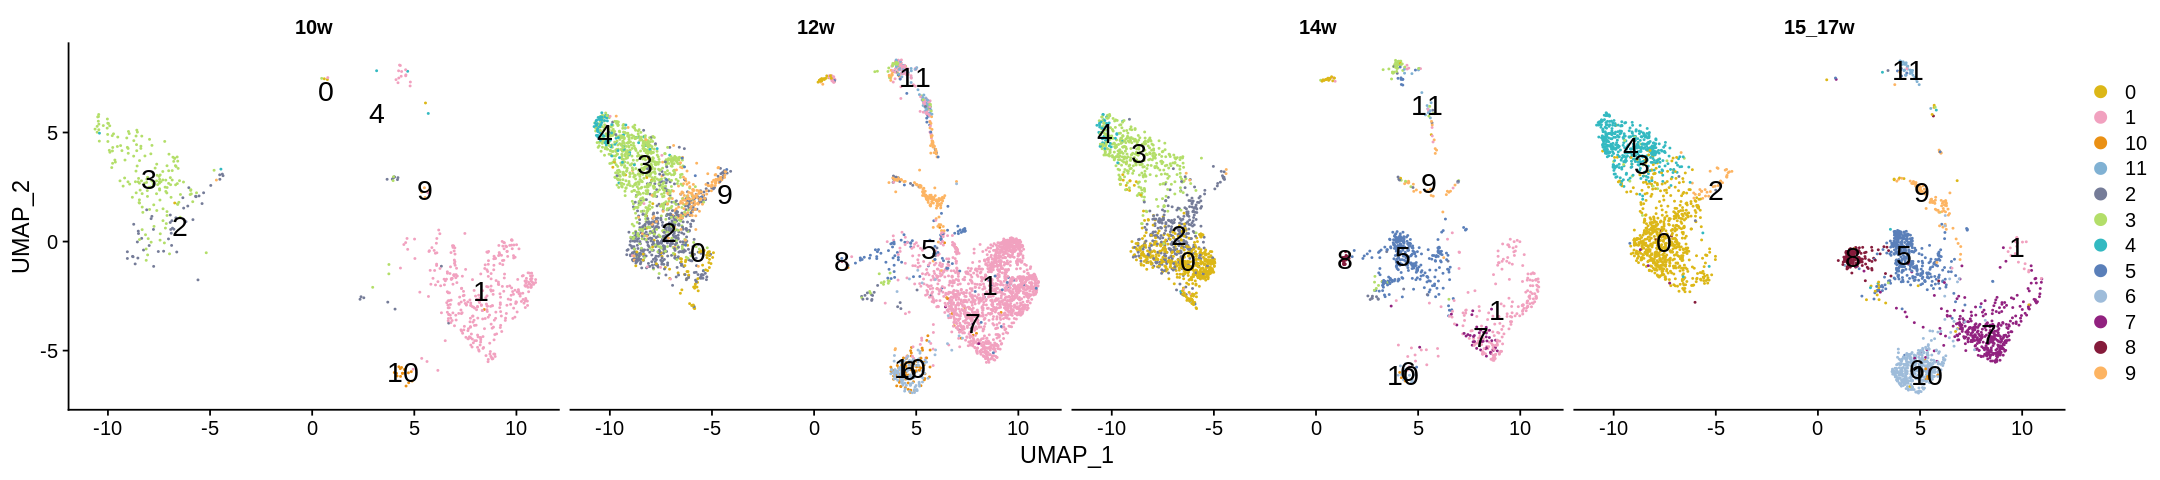

In [71]:
options(repr.plot.width=18,repr.plot.height=4)
DimPlot(total.lym.integrated,reduction = "umap",label = T,label.size = 6,split.by = "new.batch",group.by = "cellAnno",cols = usedCols)

In [44]:
table(total.lym.integrated$cellAnno,total.lym.integrated$new.batch)

    
      10w  12w  14w 15_17w
  0     4  107  539    696
  1   379 1627  236     21
  10   16  128    4      6
  11    0   72   15     32
  2    62  572  351      5
  3   171  773  433     15
  4     5   79   38    441
  5     0  124  320    397
  6     0  127   22    394
  7     0    3   44    386
  8     0    1   23    164
  9     6  311   32    125

In [45]:
save(total.lym.integrated,file="total.lym.integrated.seurat.object.Rdata")

In [46]:
library(reshape2)
num.stat.melt=as.data.frame(table(total.lym.integrated$cellAnno,total.lym.integrated$new.batch))
head(num.stat.melt)

Var1,Var2,Freq
0,10w,4
1,10w,379
10,10w,16
11,10w,0
2,10w,62
3,10w,171


In [47]:
num.stat=dcast(num.stat.melt,formula =Var1 ~ Var2,value.var = "Freq" )

In [48]:
num.stat

Var1,10w,12w,14w,15_17w
0,4,107,539,696
1,379,1627,236,21
10,16,128,4,6
11,0,72,15,32
2,62,572,351,5
3,171,773,433,15
4,5,79,38,441
5,0,124,320,397
6,0,127,22,394
7,0,3,44,386


In [50]:
rownames(num.stat)=num.stat$Var1
num.stat$Var1=NULL

In [53]:
colSums(num.stat)

10w    12w    14w 15_17w 
   643   3924   2057   2682

In [54]:
num.stat.ratio=apply(num.stat,2,function(x){x/sum(x)})

In [55]:
num.stat.ratio

,10w,12w,14w,15_17w
0,0.00622084,0.027268094,0.262032086,0.259507830
1,0.58942457,0.414627931,0.114730190,0.007829978
10,0.02488336,0.032619776,0.001944579,0.002237136
11,0.00000000,0.018348624,0.007292173,0.011931394
2,0.09642302,0.145769623,0.170636850,0.001864280
3,0.26594090,0.196992864,0.210500729,0.005592841
4,0.00777605,0.020132518,0.018473505,0.164429530
5,0.00000000,0.031600408,0.155566359,0.148023863
6,0.00000000,0.032364934,0.010695187,0.146905295
7,0.00000000,0.000764526,0.021390374,0.143922446


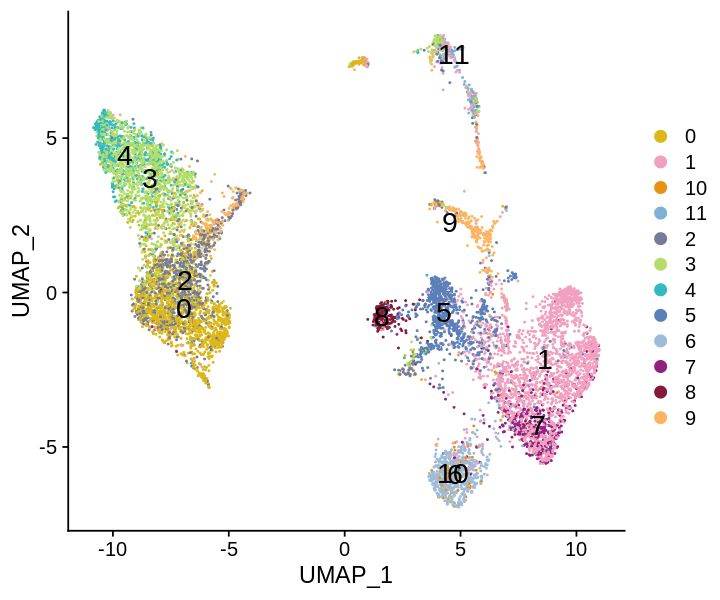

In [72]:
options(repr.plot.width=6,repr.plot.height=5)
DimPlot(total.lym.integrated,reduction = "umap",label = T,label.size = 6,group.by = "cellAnno",cols = usedCols)

In [73]:
p=DimPlot(total.lym.integrated,reduction = "umap",label = T,label.size = 6,group.by = "cellAnno",cols = usedCols)
pdf("total.lym.integrated.umap.pdf",width = 6,height = 5)
print(p)
dev.off()

png 
  2

In [74]:
total.lym.integrated

An object of class Seurat 
27279 features across 9306 samples within 2 assays 
Active assay: integrated (2000 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [75]:
total.lym.integrated <- RunTSNE(object = total.lym.integrated, dims.use = 1:30, do.fast = TRUE)

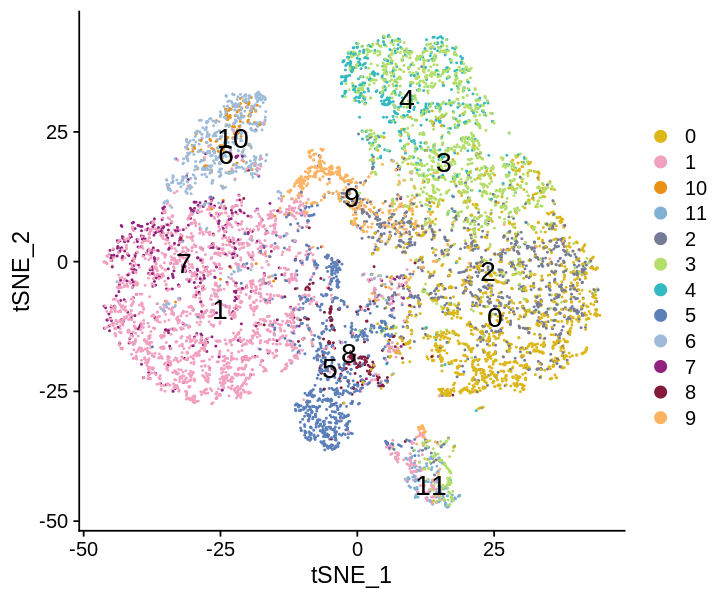

In [76]:
options(repr.plot.width=6,repr.plot.height=5)
DimPlot(total.lym.integrated,reduction = "tsne",label = T,label.size = 6,group.by = "cellAnno",cols = usedCols)

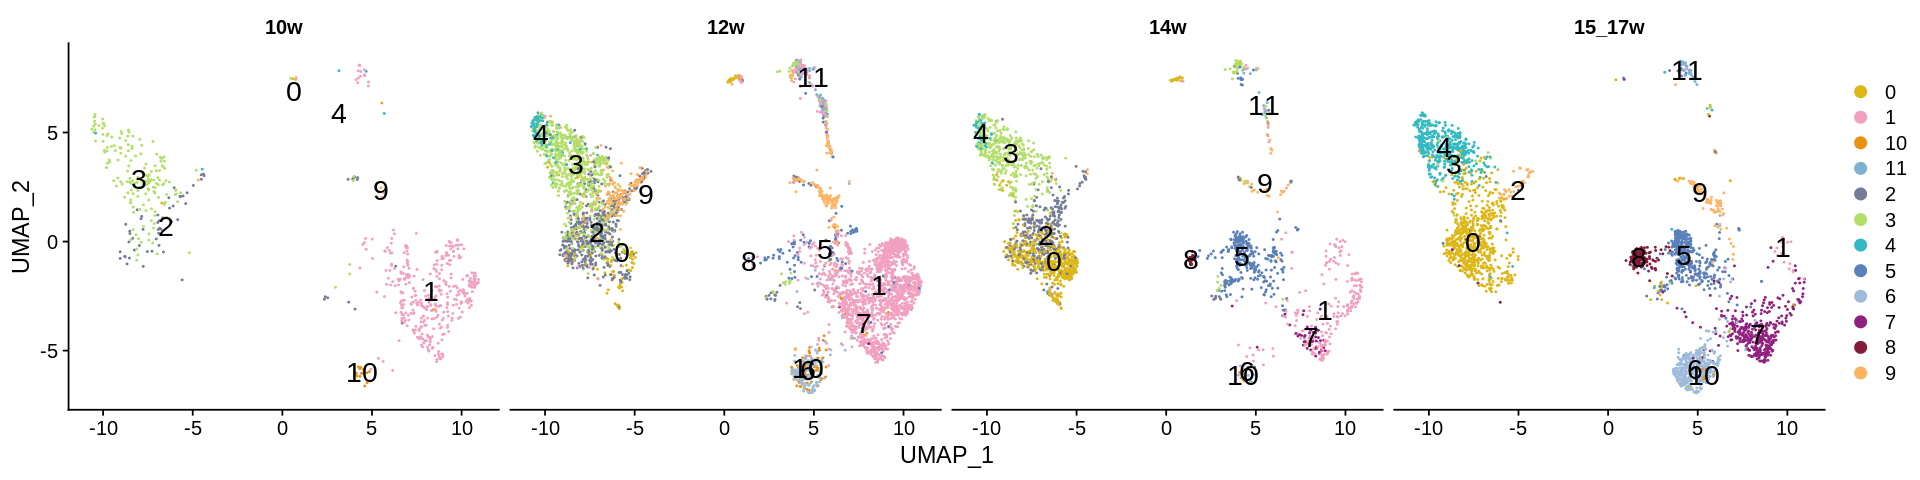

In [82]:
options(repr.plot.width=16,repr.plot.height=4)
DimPlot(total.lym.integrated,reduction = "umap",label = T,label.size = 6,split.by = "new.batch",group.by = "cellAnno",cols = usedCols)

In [83]:
p=DimPlot(total.lym.integrated,reduction = "umap",label = T,label.size = 6,split.by = "new.batch",group.by = "cellAnno",cols = usedCols)
pdf("total.lym.integrated.split.umap.pdf",width = 16 ,height =4)
print(p)
dev.off()

png 
  2

In [87]:
DefaultAssay(total.lym.integrated)="RNA"

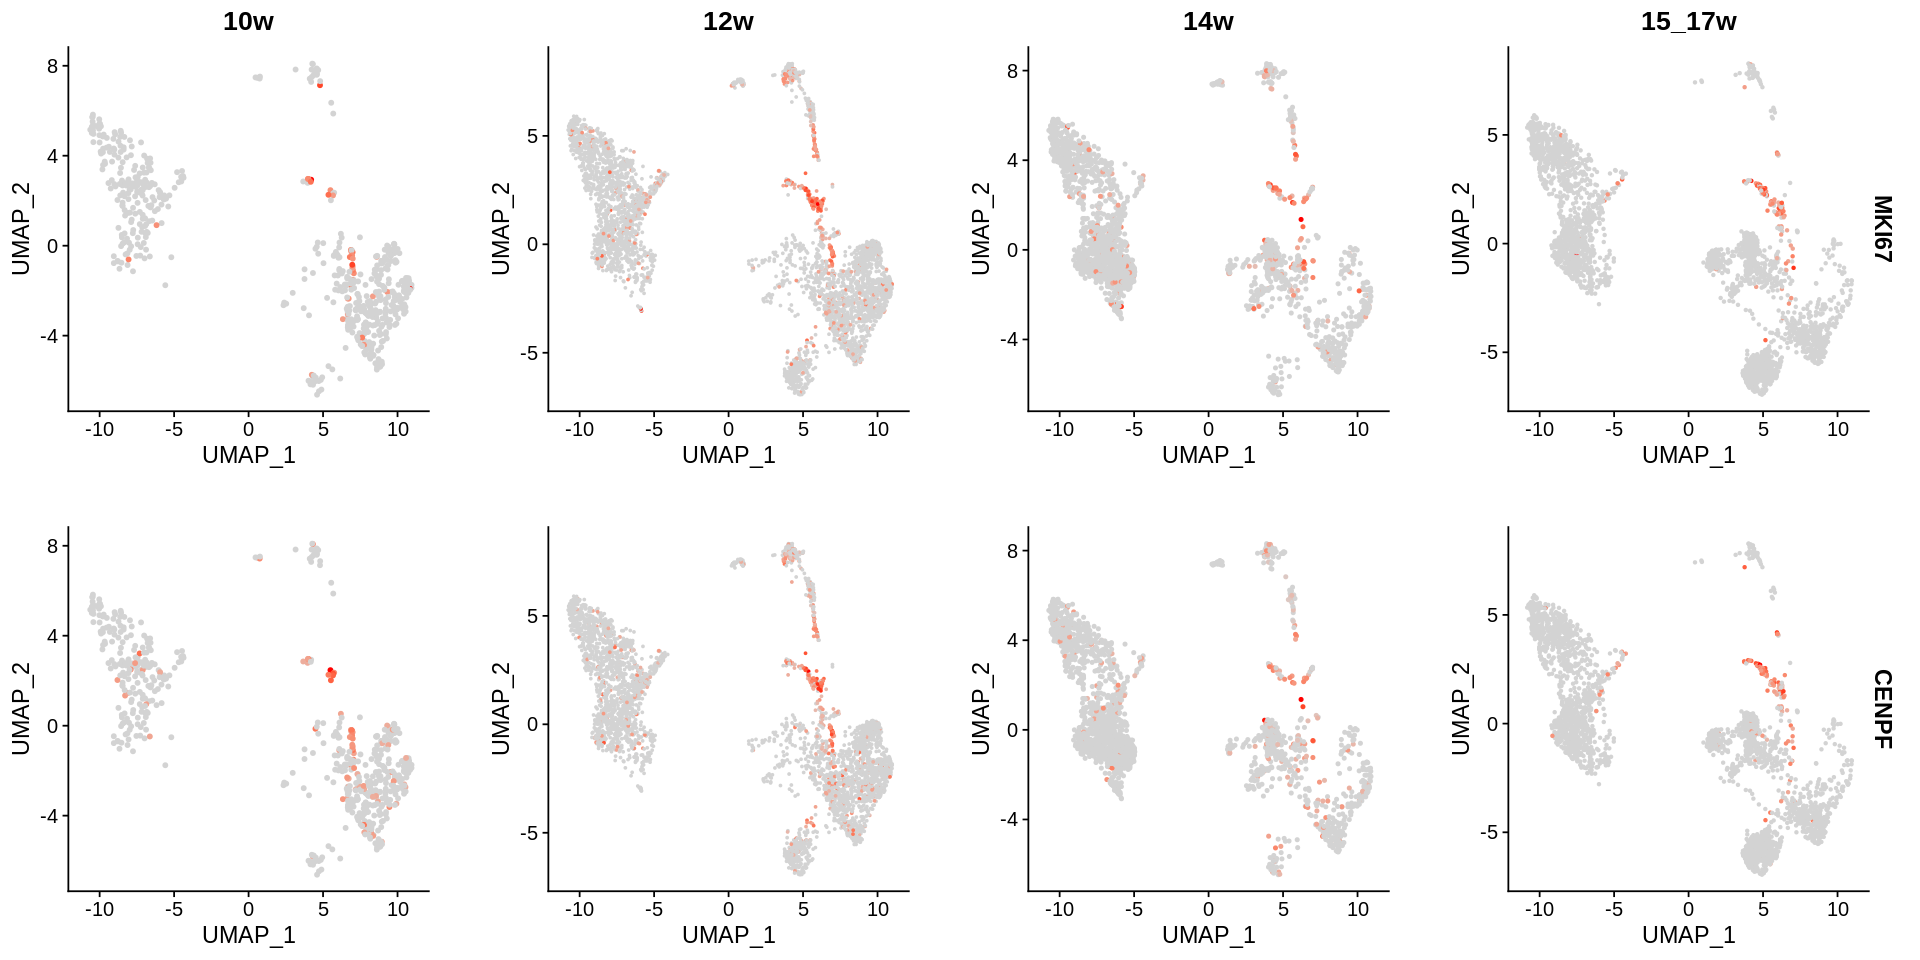

In [88]:
options(repr.plot.width=16,repr.plot.height=8)
FeaturePlot(total.lym.integrated,features = c("MKI67","CENPF"),split.by = "new.batch",cols =c("lightgrey","red"))